In [7]:
#EDA Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## feature engineering libraries
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split

## model preparation libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

## model evaluation libraries
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

## model hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import joblib
%matplotlib inline

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
berry_data = pd.read_csv('WildBlueberryPollinationSimulationData.csv')

In [9]:
berry_data.drop('Row#',axis=1,inplace=True)
berry_data.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


Exploratory Data Analysis

In [10]:
berry_data.isna().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

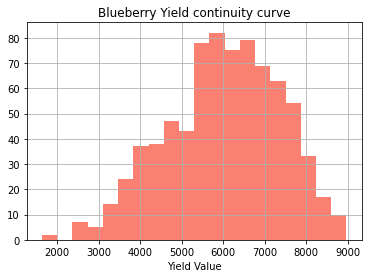

In [11]:
plt.grid()
plt.title("Blueberry Yield continuity curve")
plt.xlabel("Yield Value")
plt.hist(x=berry_data["yield"], bins=20, color="salmon");

In [12]:
def select_features_corr_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_corr = SelectKBest(score_func=f_regression, k='all')
    else:
        fs_corr = SelectKBest(score_func=f_regression, k = x)
    fs_corr.fit(X_train, y_train)
    X_train_fs = fs_corr.transform(X_train)
    X_test_fs = fs_corr.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_corr

def select_features_infogain_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_info = SelectKBest(score_func=mutual_info_regression, k='all')
    else:
        fs_info = SelectKBest(score_func=mutual_info_regression, k=x)
    fs_info.fit(X_train, y_train)
    X_train_fs = fs_info.transform(X_train)
    X_test_fs = fs_info.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_info

In [13]:
X13 = berry_data.drop(["yield", "fruitmass", "fruitset", "seeds"], axis=1)
y = berry_data["yield"]

X_train13, X_test13, y_train13, y_test13 = train_test_split(X13, y, test_size=0.33, random_state=1)

X_train_fs_corr13, X_test_fs_corr13, fs_corr13 = select_features_corr_based(X_train13, y_train13, X_test13)
X_train_fs_info13, X_test_fs_info13, fs_info13 = select_features_infogain_based(X_train13, y_train13, X_test13)

In [14]:
X17 = berry_data.drop(["yield"], axis=1)

X_train17, X_test17, y_train17, y_test17 = train_test_split(X17, y, test_size=0.33, random_state=1)

X_train_fs_corr17, X_test_fs_corr17, fs_corr17 = select_features_corr_based(X_train17, y_train17, X_test17)
X_train_fs_info17, X_test_fs_info17, fs_info17 = select_features_infogain_based(X_train17, y_train17, X_test17)

Feature 0: 184.510812
Feature 1: 56.025407
Feature 2: 56.110457
Feature 3: 8.547399
Feature 4: 115.949147
Feature 5: 10.584235
Feature 6: 8.223105
Feature 7: 9.465591
Feature 8: 10.721786
Feature 9: 9.746869
Feature 10: 9.334603
Feature 11: 207.887147
Feature 12: 211.684877


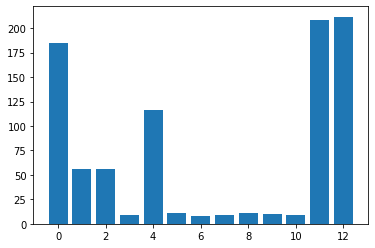

Feature 0: 0.140005
Feature 1: 0.095345
Feature 2: 0.072908
Feature 3: 0.051442
Feature 4: 0.112637
Feature 5: 0.084851
Feature 6: 0.085330
Feature 7: 0.083554
Feature 8: 0.090117
Feature 9: 0.084561
Feature 10: 0.081858
Feature 11: 0.192278
Feature 12: 0.193359


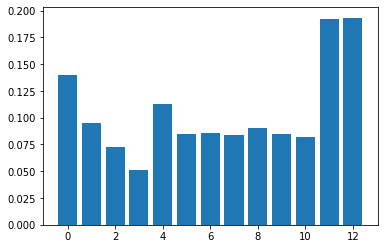

In [15]:
def fs_score_plot(fs_func):
    
    for i in range(len(fs_func.scores_)):
        print('Feature %d: %f' % (i, fs_func.scores_[i]))
    # plot the scores
    plt.bar([i for i in range(len(fs_func.scores_))], fs_func.scores_)
    plt.show()
    
fs_score_plot(fs_corr13)
fs_score_plot(fs_info13)

Feature 0: 184.510812
Feature 1: 56.025407
Feature 2: 56.110457
Feature 3: 8.547399
Feature 4: 115.949147
Feature 5: 10.584235
Feature 6: 8.223105
Feature 7: 9.465591
Feature 8: 10.721786
Feature 9: 9.746869
Feature 10: 9.334603
Feature 11: 207.887147
Feature 12: 211.684877
Feature 13: 16312.305141
Feature 14: 3614.015492
Feature 15: 7675.208274


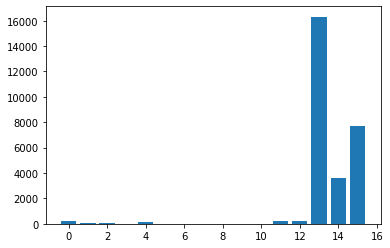

Feature 0: 0.141116
Feature 1: 0.101886
Feature 2: 0.072267
Feature 3: 0.053817
Feature 4: 0.113647
Feature 5: 0.084295
Feature 6: 0.089159
Feature 7: 0.083016
Feature 8: 0.087610
Feature 9: 0.083047
Feature 10: 0.081870
Feature 11: 0.190817
Feature 12: 0.189930
Feature 13: 1.950900
Feature 14: 1.614620
Feature 15: 1.636104


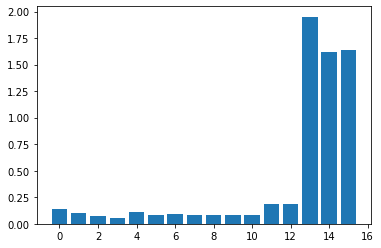

In [16]:
fs_score_plot(fs_corr17)
fs_score_plot(fs_info17)

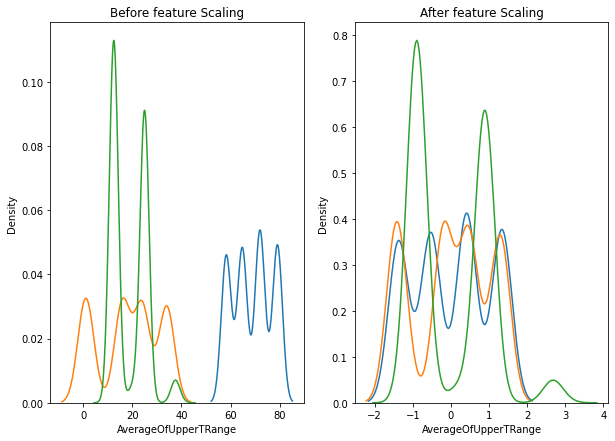

In [17]:
sc = StandardScaler()
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 7))
ax1.set_title('Before feature Scaling')
sns.kdeplot(berry_data["AverageOfUpperTRange"], ax=ax1)
sns.kdeplot(berry_data["RainingDays"], ax=ax1)
sns.kdeplot(berry_data["clonesize"], ax=ax1)

scaled_berry_data = pd.DataFrame(sc.fit_transform(berry_data), columns=berry_data.columns)
ax2.set_title('After feature Scaling')
sns.kdeplot(scaled_berry_data["AverageOfUpperTRange"], ax=ax2)
sns.kdeplot(scaled_berry_data["RainingDays"], ax=ax2)
sns.kdeplot(scaled_berry_data["clonesize"], ax=ax2)
plt.show()

In [18]:
X_train13 = sc.fit_transform(X_train13)
X_train17 = sc.fit_transform(X_train17)
X_test13 = sc.fit_transform(X_test13)
X_test17 = sc.fit_transform(X_test17);

X_train_fs_info13, X_test_fs_info13, fs_info13 = select_features_infogain_based(X_train13, y_train13, X_test13, x=10)
X_train_fs_info17, X_test_fs_info17, fs_info17 = select_features_infogain_based(X_train17, y_train17, X_test17, x=10)

X_train_fs_info13.shape

(520, 10)

Linear Regression

In [20]:
lreg = LinearRegression()

lreg.fit(X_train_fs_info13, y_train13)

yhat13 = lreg.predict(X_test_fs_info13)

mae13_linear = mean_absolute_error(y_test13, yhat13)
mse13_linear = mean_squared_error(y_test13, yhat13)
rmse13_linear = np.sqrt(mse13_linear)

print('MAE: %.3f' % mae13_linear)
print('MSE: %.3f' % mse13_linear)
print('RMSE: %.3f' % rmse13_linear)

MAE: 562.959
MSE: 603855.975
RMSE: 777.082


In [21]:
lreg.fit(X_train_fs_info17, y_train17)

yhat17 = lreg.predict(X_test_fs_info17)
mae17_linear = mean_absolute_error(y_test17, yhat17)
mse17_linear = mean_squared_error(y_test17, yhat17)
rmse17_linear = np.sqrt(mse17_linear)

print('MAE: %.3f' % mae17_linear)
print('MSE: %.3f' % mse17_linear)
print('RMSE: %.3f' % rmse17_linear)

MAE: 150.309
MSE: 35205.909
RMSE: 187.632


RandomForest Regression

In [22]:
rf = RandomForestRegressor()

rf.fit(X_train_fs_info13, y_train13)
    
yhat13 = rf.predict(X_test_fs_info13)
mae13_rf = mean_absolute_error(y_test13, yhat13)
mse13_rf = mean_squared_error(y_test13, yhat13)
rmse13_rf = np.sqrt(mse13_rf)

print('MAE: %.3f' % mae13_rf)
print('MSE: %.3f' % mse13_rf)
print('RMSE: %.3f' % rmse13_rf)

MAE: 387.555
MSE: 248865.783
RMSE: 498.864


In [23]:
rf.fit(X_train_fs_info17, y_train17)

yhat17 = rf.predict(X_test_fs_info17)
mae17_rf = mean_absolute_error(y_test17, yhat17)
mse17_rf = mean_squared_error(y_test17, yhat17)
rmse17_rf = np.sqrt(mse17_rf)

print('MAE: %.3f' % mae17_rf)
print('MSE: %.3f' % mse17_rf)
print('RMSE: %.3f' % rmse17_rf)

MAE: 146.693
MSE: 43468.905
RMSE: 208.492


In [24]:
dtree = DecisionTreeRegressor()

dtree.fit(X_train_fs_info13, y_train13)

yhat13 = dtree.predict(X_test_fs_info13)
mae13_dtree = mean_absolute_error(y_test13, yhat13)
mse13_dtree = mean_squared_error(y_test13, yhat13)
rmse13_dtree = np.sqrt(mse13_dtree)

print('MAE: %.3f' % mae13_dtree)
print('MSE: %.3f' % mse13_dtree)
print('RMSE: %.3f' % rmse13_dtree)

MAE: 400.614
MSE: 269663.523
RMSE: 519.291


In [25]:
dtree.fit(X_train_fs_info17, y_train17)

yhat17 = dtree.predict(X_test_fs_info17)
mae17_dtree = mean_absolute_error(y_test17, yhat17)
mse17_dtree = mean_squared_error(y_test17, yhat17)
rmse17_dtree = np.sqrt(mse17_dtree)

print('MAE: %.3f' % mae17_dtree)
print('MSE: %.3f' % mse17_dtree)
print('RMSE: %.3f' % rmse17_dtree)

MAE: 164.572
MSE: 57007.212
RMSE: 238.762


XGBRegression

In [27]:
xgb = XGBRegressor()

xgb.fit(X_train_fs_info13, y_train13)

yhat13 = xgb.predict(X_test_fs_info13)

mae13_xgb = mean_absolute_error(y_test13, yhat13)
mse13_xgb = mean_squared_error(y_test13, yhat13)
rmse13_xgb = np.sqrt(mse13_xgb)

print('MAE: %.3f' % mae13_xgb)
print('MSE: %.3f' % mse13_xgb)
print('RMSE: %.3f' % rmse13_xgb)

MAE: 374.147
MSE: 228185.676
RMSE: 477.688


In [28]:
xgb.fit(X_train_fs_info17, y_train17)

yhat17 = xgb.predict(X_test_fs_info17)

mae17_xgb = mean_absolute_error(y_test17, yhat17)
mse17_xgb = mean_squared_error(y_test17, yhat17)
rmse17_xgb = np.sqrt(mse17_xgb)

print('MAE: %.3f' % mae17_xgb)
print('MSE: %.3f' % mse17_xgb)
print('RMSE: %.3f' % rmse17_xgb)

MAE: 145.976
MSE: 42165.763
RMSE: 205.343


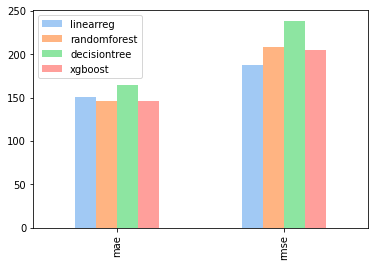

In [29]:
error_rec = {
    "linearreg": {
        "mae": mae17_linear,
        "rmse": rmse17_linear
    },
    "randomforest": {
        "mae": mae17_rf,
        "rmse": rmse17_rf
    },
    "decisiontree": {
        "mae": mae17_dtree,
        "rmse": rmse17_dtree
    },
    "xgboost": {
        "mae": mae17_xgb,
        "rmse": rmse17_xgb
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]])

In [30]:
cv = RepeatedKFold(n_splits= 78,n_repeats = 3,random_state = 1)
fs_info_v0 = SelectKBest(score_func = mutual_info_regression)

# y_test17, yhat17, X_train_fs_info13, y_train13, X_test_fs_info13 (basic models)
# 
# define pipeline for each algorithm
# define GSCV for each
# loop through it


pipe_lr = Pipeline([
    ('sel', fs_info_v0), 
    ('model', LinearRegression())
])

pipe_rf = Pipeline([
    ('sel', fs_info_v0), 
    ('model', RandomForestRegressor(random_state=1))
])

pipe_dtree = Pipeline([
    ('sel', fs_info_v0), 
    ('model', DecisionTreeRegressor(random_state=1))
])

pipe_xgb = Pipeline([
    ('sel', fs_info_v0), 
    ('model', XGBRegressor(random_state=1))
])

In [31]:
param_range = [15, 18, 10]
param_range_fl = [5.0, 10.0]

grid_params_lr = [{'sel__k': [i for i in range(X_train17.shape[1]-6, X_train17.shape[1]-4)],
        }] 


grid_params_rf = [{'sel__k': [i for i in range(X_train17.shape[1]-6, X_train17.shape[1]-4)],
        'model__criterion': ['mse', 'mae'],
#         'model__max_depth': param_range,
#         'model__min_samples_split': param_range[1:]
                  }]


grid_params_dtree = [{'sel__k': [i for i in range(X_train17.shape[1]-6, X_train17.shape[1]-4)],
                    'model__criterion': ['mse', 'mae'],
#                      'model__max_depth': param_range,
#                      'model__max_features': ['auto', 'sqrt']
                     }]


grid_params_xgb = [{'sel__k': [i for i in range(X_train17.shape[1]-6, X_train17.shape[1]-4)],
#                     'model__max_depth': [9,12],
#                    'model__min_child_weight': [7,8],
                   'model__subsample': [i/10. for i in range(9,11)]
                   }]



LR = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='neg_mean_absolute_error',
            cv=cv)

RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

DT = GridSearchCV(estimator=pipe_dtree,
            param_grid=grid_params_dtree,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

XGB = GridSearchCV(estimator=pipe_xgb,
            param_grid=grid_params_xgb,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

grids = [LR,RF,XGB,DT]

# Creating a dict for our reference
grid_dict = {0: 'Logistic Regression', 
        1: 'Random Forest',
        2: 'XGBoost',
        3: 'Decision Tree'}

In [32]:
def extract_best_model(grids: list, grid_dict: dict):
    print('Performing model optimizations...')
    least_mae = 270817
    best_regr = 0
    best_gs = ''
    for idx, gs in enumerate(grids):
        print('\nEstimator: %s' % grid_dict[idx])
        gs.fit(X_train17, y_train17)
        print('Best Config: %s' % gs.best_params_)
        # Best training data accuracy
        print('Best MAE: %.3f' % gs.best_score_)
        # Predict on test data with best params
        y_pred_v0 = gs.predict(X_test17)
        # Test data accuracy of model with best params
        print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test17, y_pred_v0))
        print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test17, y_pred_v0)))
        
        # Track best (least test error) model
        if mean_absolute_error(y_test17, y_pred_v0) < least_mae:
            least_mae = mean_absolute_error(y_test17, y_pred_v0)
            best_gs = gs
            best_regr = idx
    print('\nClassifier with least test set MAE: %s' % grid_dict[best_regr])
    
    return (grid_dict[best_regr], best_gs, least_mae)

In [33]:
best_model_name_v0, best_model_v0, least_mae_v0 = extract_best_model(grids= grids, grid_dict = grid_dict)

print(f"Best Model: {best_model_name_v0}")
print(f"Error Rate: {least_mae_v0}")
print(best_model_v0)

Performing model optimizations...

Estimator: Logistic Regression
Best Config: {'sel__k': 11}
Best MAE: -101.480
Test set mean absolute error for best params: 172.887 
Test set root mean squared error for best params: 13.149 

Estimator: Random Forest
Best Config: {'model__criterion': 'mse', 'sel__k': 11}
Best MAE: -122.290
Test set mean absolute error for best params: 146.888 
Test set root mean squared error for best params: 12.120 

Estimator: XGBoost
Best Config: {'model__subsample': 0.9, 'sel__k': 11}
Best MAE: -123.765
Test set mean absolute error for best params: 135.957 
Test set root mean squared error for best params: 11.660 

Estimator: Decision Tree
Best Config: {'model__criterion': 'mae', 'sel__k': 10}
Best MAE: -162.202
Test set mean absolute error for best params: 179.687 
Test set root mean squared error for best params: 13.405 

Classifier with least test set MAE: XGBoost
Best Model: XGBoost
Error Rate: 135.95669985177528
GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_sp

In [34]:
grid_params_rf1 = [{
        'model__max_depth': param_range,
        'model__min_samples_split': [2,5]
                  }]

RF1 = GridSearchCV(
    estimator = Pipeline([
                    ('sel', SelectKBest(score_func=mutual_info_regression, k=11)), 
                    ('model', RandomForestRegressor(random_state=1, criterion='mse'))
                ]),
            param_grid=grid_params_rf1,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)


print("Random Forest V-1 optimising...")
RF1.fit(X_train17, y_train17)
print('Best Config: %s' % RF1.best_params_)
print('Best MAE: %.3f' % RF1.best_score_)
y_pred_v1_rf1 = RF1.predict(X_test17)
print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test17, y_pred_v1_rf1))
print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test17, y_pred_v1_rf1)))

Random Forest V-1 optimising...
Best Config: {'model__max_depth': 15, 'model__min_samples_split': 2}
Best MAE: -122.199
Test set mean absolute error for best params: 146.849 
Test set root mean squared error for best params: 12.118 


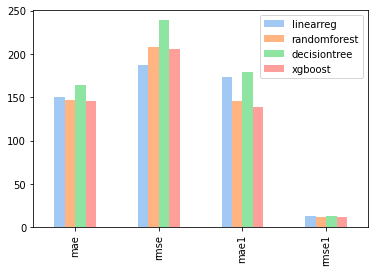

In [35]:
error_rec_tune = {
    "linearreg": {
        "mae": mae17_linear,
        "rmse": rmse17_linear,
        'mae1': 172.887 ,
        'rmse1': 13.149
    },
    "randomforest": {
        "mae": mae17_rf,
        "rmse": rmse17_rf,
        'mae1': 145.969,
        'rmse1': 12.085 
    },
    "decisiontree": {
        "mae": mae17_dtree,
        "rmse": rmse17_dtree,
        'mae1': 179.687 ,
        'rmse1': 13.405 
    },
    "xgboost": {
        "mae": mae17_xgb,
        "rmse": rmse17_xgb,
        'mae1': 138.506 ,
        'rmse1': 11.769 
    },
}

pd.DataFrame(error_rec_tune).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);